<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [1]:
import kagglehub
import os
import pandas as pd
import plotly.express as px

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

c:\Users\Virus5600\miniconda3\envs\com222\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Virus5600\.cache\kagglehub\datasets\imdevskp\corona-virus-report\versions\166


In [2]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

True


['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_county_wise.csv',
 'worldometer_data.csv']

In [3]:
mydataset = path + "/" + contents[1]
mydataset

'C:\\Users\\Virus5600\\.cache\\kagglehub\\datasets\\imdevskp\\corona-virus-report\\versions\\166/covid_19_clean_complete.csv'

In [4]:
df = pd.read_csv(mydataset)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [7]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

In [9]:
# put your answer here
globalTrend = df.groupby("Date")["Confirmed"].sum().reset_index()
globalTrend

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


<Axes: title={'center': 'Global Trend'}, xlabel='Date'>

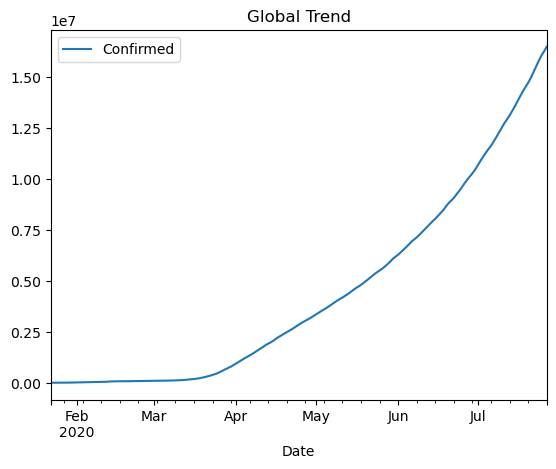

In [10]:
globalTrend.plot(title="Global Trend", x="Date", y="Confirmed")

2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

In [11]:
# put your answer here

# Philippines, China, US
countries = [
    "China",
    "Philippines",
    "US"
]

pd.DataFrame(df["Country/Region"].unique())

,0
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
182,Sao Tome and Principe
183,Yemen
184,Comoros
185,Tajikistan


In [12]:
countryDF = df[df["Country/Region"].isin(countries)]
countryDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.825700,117.226400,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.182400,116.414200,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.057200,107.874000,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.078900,117.987400,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.751800,104.286100,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
48885,Xinjiang,China,41.112900,85.240100,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.974000,101.487000,2020-07-27,190,2,186,2,Western Pacific
48887,Zhejiang,China,29.183200,120.093400,2020-07-27,1270,1,1268,1,Western Pacific
48987,NaN,Philippines,12.879721,121.774017,2020-07-27,82040,1945,26446,53649,Western Pacific


<Axes: title={'center': 'Confirmed Cases of 3 Countries\n(China, Philippines, US)'}, xlabel='Date'>

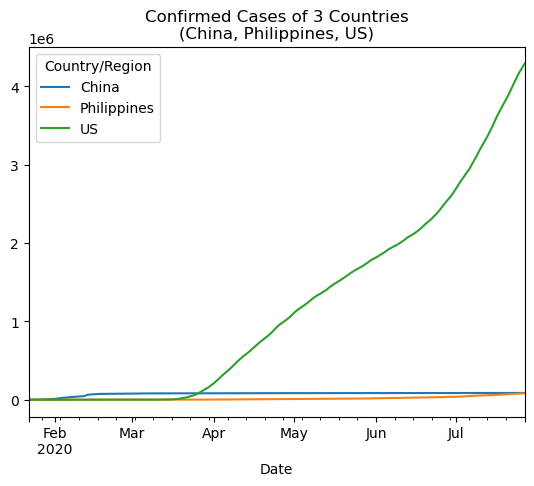

In [13]:
countryDF.pivot_table(
    index="Date",
    columns="Country/Region",
    values="Confirmed",
    aggfunc="sum"
).plot(title=f"Confirmed Cases of 3 Countries\n({', '.join(countries)})")

3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

<Axes: title={'center': 'Active and Recovered Cases in the Philippines'}, xlabel='Date'>

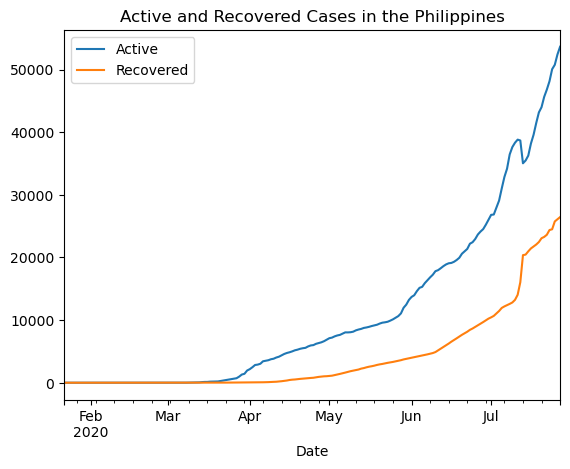

In [14]:
# put your answer here

# Let's... just stick to the Philippines since that US plot looked so absurd and will be hard due to their stupid "political" sentiments when it comes to health
# To be fair, their own government fucked them up in the health sector with those floating big pharma conspiracy and how big corpo can literally put policies that
# favors them *cough* tobacco *cough*

countryDF[countryDF['Country/Region'] == 'Philippines'].plot(
    title="Active and Recovered Cases in the Philippines",
    x="Date",
    y=["Active", "Recovered"]
)

## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

<Axes: title={'center': 'Top 10 Countries with the Most Confirmed Cases'}, xlabel='Country/Region'>

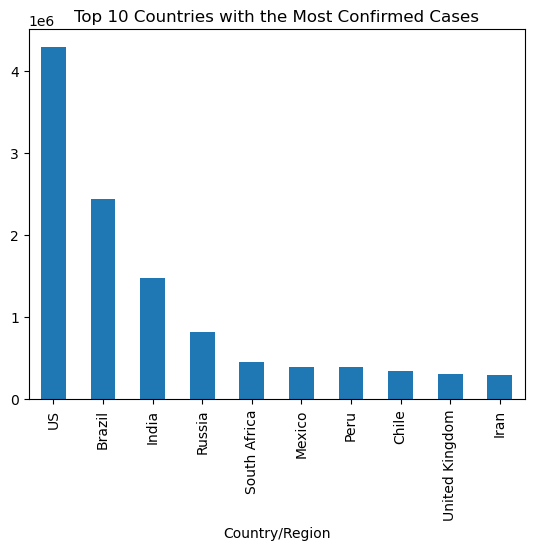

In [15]:
# put your answer here

df[df['Date'] == df['Date'].max()].groupby("Country/Region")["Confirmed"].sum(
).reset_index().sort_values("Confirmed", ascending=False).head(10).plot(
    title="Top 10 Countries with the Most Confirmed Cases",
    x="Country/Region",
    y="Confirmed",
    kind="bar",
    legend=False
)

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

<Axes: title={'center': 'Confirmed Cases by WHO Region'}, xlabel='WHO Region'>

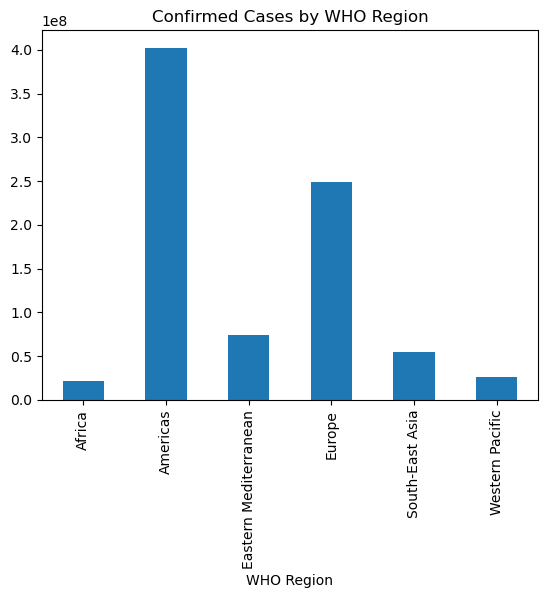

In [16]:
# put your answer here
df.groupby("WHO Region").agg({"Confirmed": "sum"}).reset_index().plot(
    title="Confirmed Cases by WHO Region",
    x="WHO Region",
    y="Confirmed",
    kind="bar",
    legend=False
)

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [17]:
# put your answer here

fig = px.scatter_geo(
    df[df['Date'] == df['Date'].max()],
    lat="Lat",
    lon="Long",
    size="Confirmed",
    hover_name="Country/Region",
    projection="natural earth",
    title=f"Global Distribution of Confirmed Cases as of {df['Date'].max().date()}"
)

fig.show()

7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

In [18]:
df.head(1)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean


In [19]:
# put your answer here
region = df[df['Country/Region'] == 'Philippines'].get("WHO Region").unique()[0]
region

'Western Pacific'

In [20]:
regFig = px.scatter_map(
    df[df['WHO Region'] == region],
    lat="Lat",
    lon="Long",
    size="Confirmed",
    hover_name="Country/Region",
    zoom=2,
    title=f"Regional Distribution of Confirmed Cases in {region} Region"
)

regFig.show()